In [1]:
path="C:\\Users\\Patrick\\Desktop\\TRAFFIC_CLASSIFICATION\\myData"
labelsFile="C:\\Users\\Patrick\\Desktop\\TRAFFIC_CLASSIFICATION\\labels.csv"

In [2]:
import cv2
import os#package helps to list folders in operating system , to work with the files
myList=os.listdir(path)

In [3]:
noOfClasses=len(myList)
noOfClasses

43

In [4]:
images=[]
classNo=[]
print('Importing Classes......')
for i in range(0,noOfClasses):
    myPicList=os.listdir(path+'/'+str(i))
    for y in myPicList:
        Img=cv2.imread(path+'/'+str(i)+'/'+y)
        images.append(Img)
        classNo.append(i)
    print('done',i)
    

Importing Classes......
done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done 27
done 28
done 29
done 30
done 31
done 32
done 33
done 34
done 35
done 36
done 37
done 38
done 39
done 40
done 41
done 42


In [5]:
import numpy as np
images=np.array(images)
classNo=np.array(classNo)

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(images,classNo,test_size=0.2)#ratio test_size(20 percent testing data,80 training data)
X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=0.2)
X_train.shape
y_train.shape

(22271,)

In [7]:
X_test.shape
X_validation.shape
y_test.shape
y_train

array([31,  8,  3, ..., 38, 13, 22])

In [8]:
X_test.shape
y_train.shape

(22271,)

In [9]:
import pandas as pd
data=pd.read_csv('C:\\Users\\Patrick\\Desktop\\TRAFFIC_CLASSIFICATION\\labels.csv')
data

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [10]:
for i,j in data.iterrows():#the above cell can also be represented like this
    print(i,j)

0 ClassId                       0
Name       Speed limit (20km/h)
Name: 0, dtype: object
1 ClassId                       1
Name       Speed limit (30km/h)
Name: 1, dtype: object
2 ClassId                       2
Name       Speed limit (50km/h)
Name: 2, dtype: object
3 ClassId                       3
Name       Speed limit (60km/h)
Name: 3, dtype: object
4 ClassId                       4
Name       Speed limit (70km/h)
Name: 4, dtype: object
5 ClassId                       5
Name       Speed limit (80km/h)
Name: 5, dtype: object
6 ClassId                              6
Name       End of speed limit (80km/h)
Name: 6, dtype: object
7 ClassId                        7
Name       Speed limit (100km/h)
Name: 7, dtype: object
8 ClassId                        8
Name       Speed limit (120km/h)
Name: 8, dtype: object
9 ClassId             9
Name       No passing
Name: 9, dtype: object
10 ClassId                                              10
Name       No passing for vechiles over 3.5 metric to

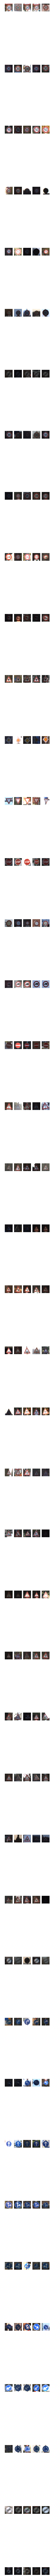

In [11]:
import matplotlib.pyplot as plt
import random
num_of_samples=[]
cols=5
num_Classes=noOfClasses
fig,axs=plt.subplots(nrows=num_Classes,ncols=cols,figsize=(5,300))
for i in range(cols):
    for j,row in data.iterrows():
        x_selected=X_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:])
        axs[j][i].axis('off')#to avoid seeing axis
        if i==2:
            axs[j][i].set_title(str(j)+'-'+row["Name"],color='White')
            num_of_samples.append(len(x_selected))

In [12]:
#equalisation-to improve the dataset
def grayscale(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#convert the image to grayscale (function COLOR_BGR2GRAY)
    return img
def equalize(img):
    img=cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img=grayscale(img)
    img=equalize(img)
    img=img/255 #to ensure all values are between 0 and 1
    return img

In [13]:
#map- to iterate as many items needed without calling the  function every time for new argument
X_train=np.array(list(map(preprocessing,X_train)))
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))

In [14]:
cv2.imshow('Grayscale_Image',X_train[random.randint(0,len(X_train)-1)])
cv2.waitKey(0)

-1

In [15]:
X_train.shape#(before output was 22271,32,32,3) which meaned 3 color channels but now its grayscale image

(22271, 32, 32)

In [16]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)

In [17]:
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [18]:
X_train.shape #only one colour channel

(22271, 32, 32, 1)

In [19]:
from keras.preprocessing.image import ImageDataGenerator

In [20]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)
dataGen.fit(X_train)
batches=dataGen.flow(X_train,y_train,batch_size=20)#it will take 20 images,modify it and then 20 changes
X_batch,y_batch=next(batches)

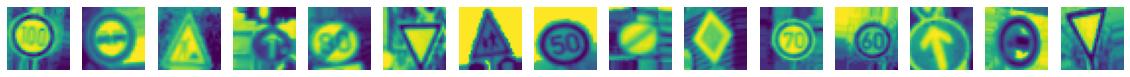

In [21]:
fig,axs=plt.subplots(1,15,figsize=(20,5))
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32,32))
    axs[i].axis('off')

plt.show()

In [22]:
from keras.utils.np_utils import to_categorical


In [23]:
y_train=to_categorical(y_train,noOfClasses)

In [24]:
y_train.shape

(22271, 43)

In [25]:
y_validation=to_categorical(y_validation,noOfClasses)
y_test=to_categorical(y_test,noOfClasses)


In [26]:
y_test.shape

(6960, 43)

In [27]:
y_validation.shape

(5568, 43)

In [28]:
##TRAINING THE MODEL
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D,MaxPooling2D
def myModel():
    model=Sequential()
    model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation='relu'))#first hidden layer
    model.add(Conv2D(60,(5,5),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #after maxpooling it is advised to reduce the size of filter so that we dont lose more data
    model.add(Conv2D(60//2,(3,3),activation='relu'))
    model.add(Conv2D(60//2,(3,3),activation='relu'))
    model.add(Conv2D(60//2,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #add dropout layer to prevent overfitting
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(43,activation='softmax'))
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model
    

In [29]:
model=myModel()

In [30]:
history=model.fit_generator(dataGen.flow(X_train,y_train,batch_size=50),validation_data=(X_validation,y_validation),epochs=20)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
446/446 [==============================] - 137s 302ms/step - loss: 3.2484 - accuracy: 0.1211 - val_loss: 1.1832 - val_accuracy: 0.6313
Epoch 2/20
446/446 [==============================] - 138s 310ms/step - loss: 1.6211 - accuracy: 0.5117 - val_loss: 0.5142 - val_accuracy: 0.8416
Epoch 3/20
446/446 [==============================] - 131s 294ms/step - loss: 1.0173 - accuracy: 0.6809 - val_loss: 0.2686 - val_accuracy: 0.9247
Epoch 4/20
446/446 [==============================] - 132s 295ms/step - loss: 0.7528 - accuracy: 0.7656 - val_loss: 0.1721 - val_accuracy: 0.9549
Epoch 5/20
446/446 [==============================] - 131s 294ms/step - loss: 0.5950 - accuracy: 0.8172 - val_loss: 0.1831 - val_accuracy: 0.9479
Epoch 6/20
446/446 [==============================] - 131s 293ms/step - loss: 0.5112 - accuracy: 0.8379 - val_loss: 0.1161 - val_accuracy: 0.9673
Epoch 7/20
446/446 [==============================] - 131s 294ms/step - loss: 0.4509 - accuracy: 0.8585 - val_loss: 0.1058 -

In [33]:
import numpy as np
import cv2
def getClassName(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'


In [34]:
cap=cv2.VideoCapture(0)#will fetch only one frame

cap.set(3,640) #width(the computer understands with 3 that width is being specified) 
cap.set(4,480) #height(height is being specified)
cap.set(10,100) #brightness

False

In [39]:
while True:
    success,imgOriginal=cap.read()
    img=np.array(imgOriginal)
    img=cv2.resize(img,(32,32))#as training dataset is of size 32,32
    img=preprocessing(img)
    cv2.imshow('Processed Image',img)
    img=img.reshape(1,32,32,1)#to change dimensions
    cv2.putText(imgOrginal,'Class:',(20,35),cv2.FONT_HERSEY_SIMPLEX,(0,0,255),2,cv2.LINE_AA)# 2 here defines width of the text and font family is cv2.LINE_AA
    cv2.putText(imgOriginal,'Probability',(20,75),cv2.FONT_HERSEY_SIMPLEX,(0,0,255),2,cv2.LINE_AA)
    probabilities=model.predict(img)#in order  to get probability
    classIndex=model.predict_classes(img) #in order to  get number
    probabilityValue=np.amax(probabilities)#max probability
    if probabilityValue>0.75:
        cv2.putText(imgOriginal,str(getClassName(classIndex)),(120,35),cv2.FONT_HERSEY_SIMPLEX,(0,0,255),2,cv2.LINE_AA)
        cv2.putText(imgOriginal,str(round(probabilityValue*100,2))+'%',(120,75),cv2.FONT_HERSEY_SIMPLEX,(0,0,255),2,cv2.LINE_AA)
    cv2.imshow('Result',imgOriginal)
    if cv2.waitKey(1) and 0xFF==ord('q'):# pressing of q button
        break


NameError: name 'imgOrginal' is not defined